In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle

In [2]:
import pickle
#how to read
fileObj = open('data/r76-80V-nairand-100eV-goodchi.pkl', 'rb')
exampleObj = pickle.load(fileObj)
fileObj.close()
print(exampleObj)

                                                                    Z1  \
                                                                    QI   
72208301829 600808   [65532, 65532, 65532, 65532, 65532, 65532, 655...   
72208302118 60055    [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            230034   [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            2620386                                                NaN   
            2700821  [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            4280153  [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            5170116  [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            5420856  [65532, 65532, 65532, 65532, 65532, 65532, 655...   
72208311151 3670143  [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            3720348  [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            3730631  [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            3740829  [65532, 65532, 65

In [3]:
import statistics as st
def isRailed(v):
    if(np.isnan(v).any()):
        return True
    if(st.mode(v)==0):
        return True
    return False

In [4]:
import singularity_pulseSave as sps

pulse_struct = sps.parseEventList('../coin_analysis/data/r76-80V-nairand-100eV-goodchi.txt')

Welcome to JupyROOT 6.24/06
   SeriesNumber  EventNumber
0   72209162200      3690436
1   72209162200      4110008
2   72209162200      5540101
3   72209162200      5960833
4   72209171225      2870212
5   72209171225      2920568
6   72209171225      4450228
7   72209171225      4680336
8   72209172155       630735
9   72208301829       600808
[72208301829 72208302118 72208311151 72209162200 72209171225 72209172155
 72210192240 72210251956 72210261049 72210262224]
[600808]
[  60055  230034 2620386 2700821 4280153 5170116 5420856]
[3670143 3720348 3730631 3740829]
[3690436 4110008 5540101 5960833]
[2870212 2920568 4450228 4680336]
[630735]
[1301001 2060066 3700639]
[4130203]
[10204]
[1021241 1060563 2210217 3100563]
{'07220830_1829': array([600808]), '07220830_2118': array([  60055,  230034, 2620386, 2700821, 4280153, 5170116, 5420856]), '07220831_1151': array([3670143, 3720348, 3730631, 3740829]), '07220916_2200': array([3690436, 4110008, 5540101, 5960833]), '07220917_1225': array([28

In [5]:
#72208301829
#550152
def getPTPulse(pulses,series=72208301829,ev=550152,chan=[('Z1','PA'),('Z1','PB'),('Z1','PC'),('Z3','PB'),('Z3','PC'),('Z3','PD')]):
    ptpulse=[]
    ccount=0
    for c in chan:
        #print(c[0])
        pulse = pulses[c[0]][c[1]][series,ev]
        if(isRailed(pulse)):
            continue
        mean = np.mean(pulse[100:])
        #print(mean)
        pulse = pulse-mean
        #print(pulse)
        #print(np.size(ptpulse))
        if(ccount==0):
            ptpulse=pulse
        else:
            ptpulse+=pulse
        ccount+=1

    #print(ptpulse)
    return ptpulse

72208301829
600808
[3149 3151 3151 ... 3148 3147 3148]


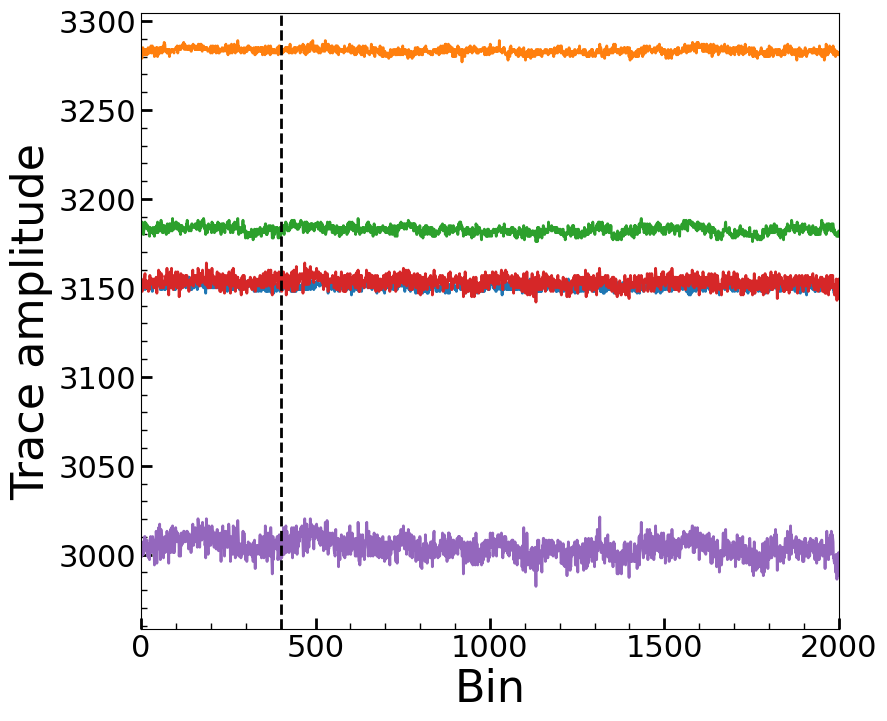

72208302118
60055
[3092 3089 3090 ... 3093 3095 3095]


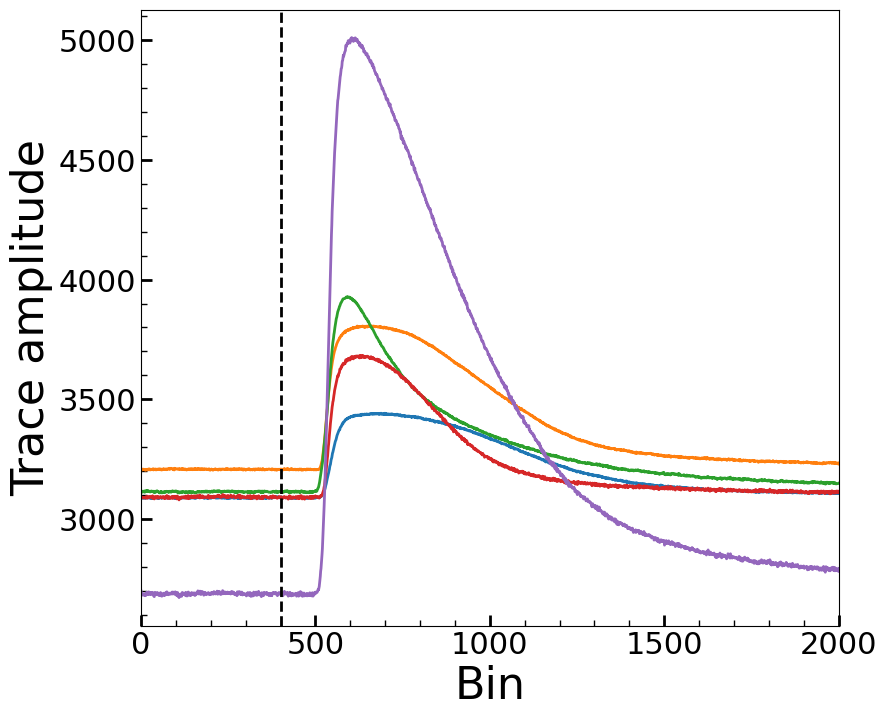

72208302118
230034
[3141 3149 3148 ... 3143 3144 3143]


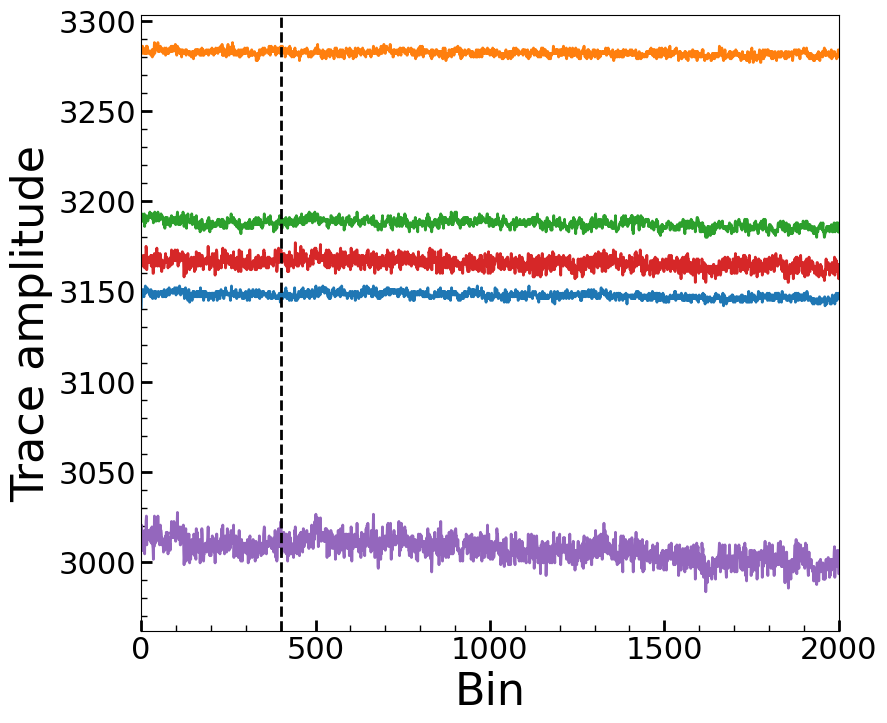

72208302118
2620386
nan
72208302118
2700821
[3250 3249 3248 ... 3397 3394 3393]


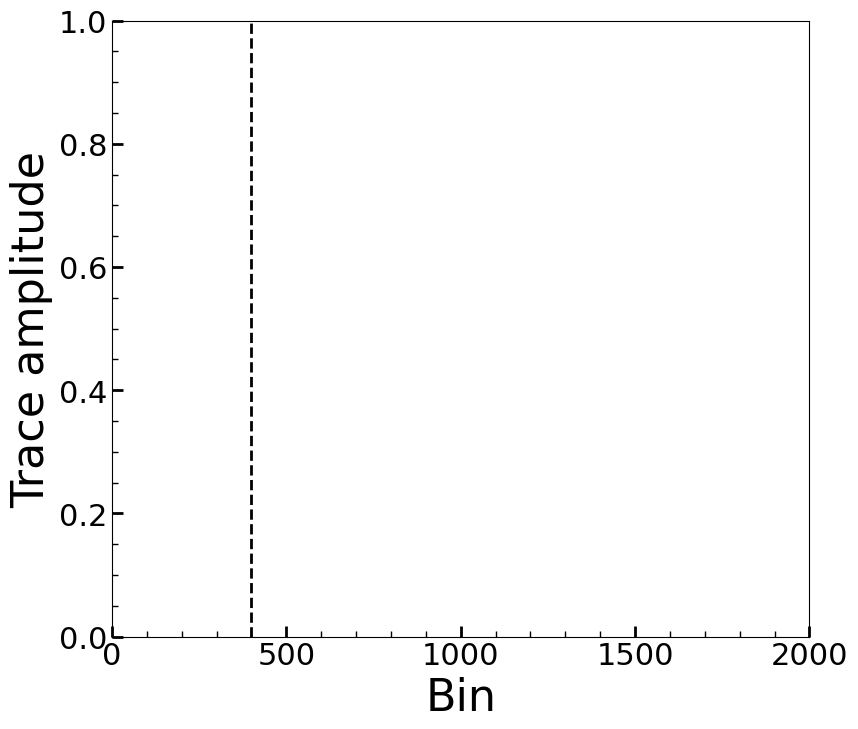

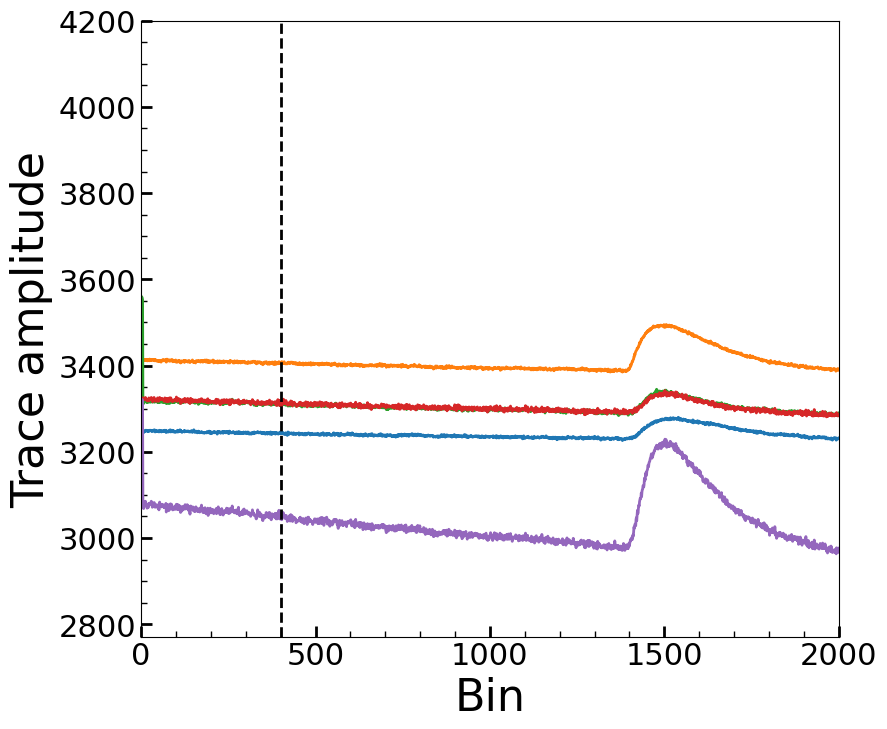

72208302118
4280153
[3312 3316 3315 ... 3376 3378 3377]


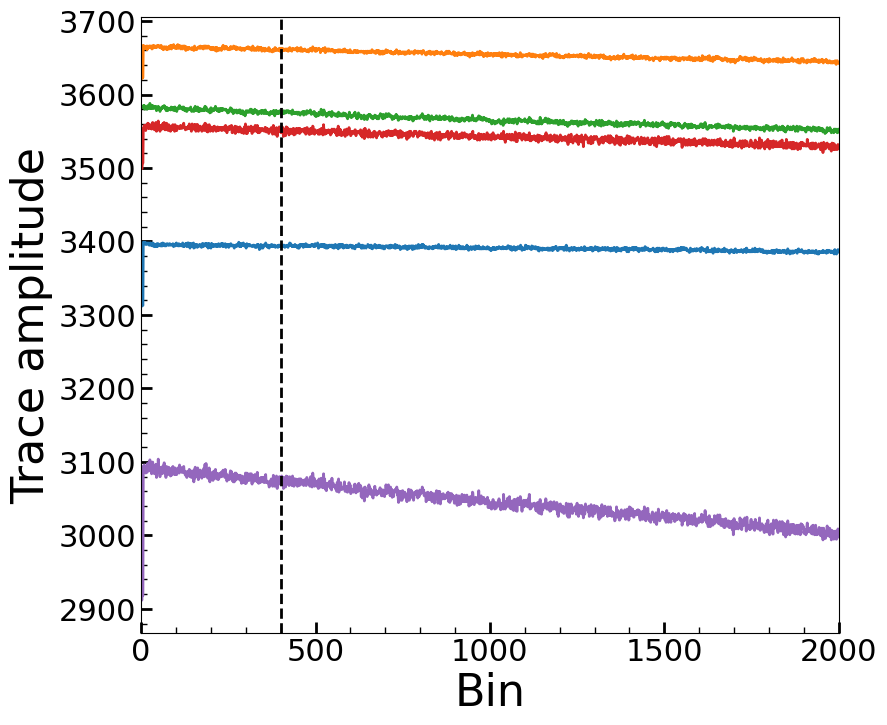

72208302118
5170116
[3385 3387 3386 ... 3378 3379 3378]


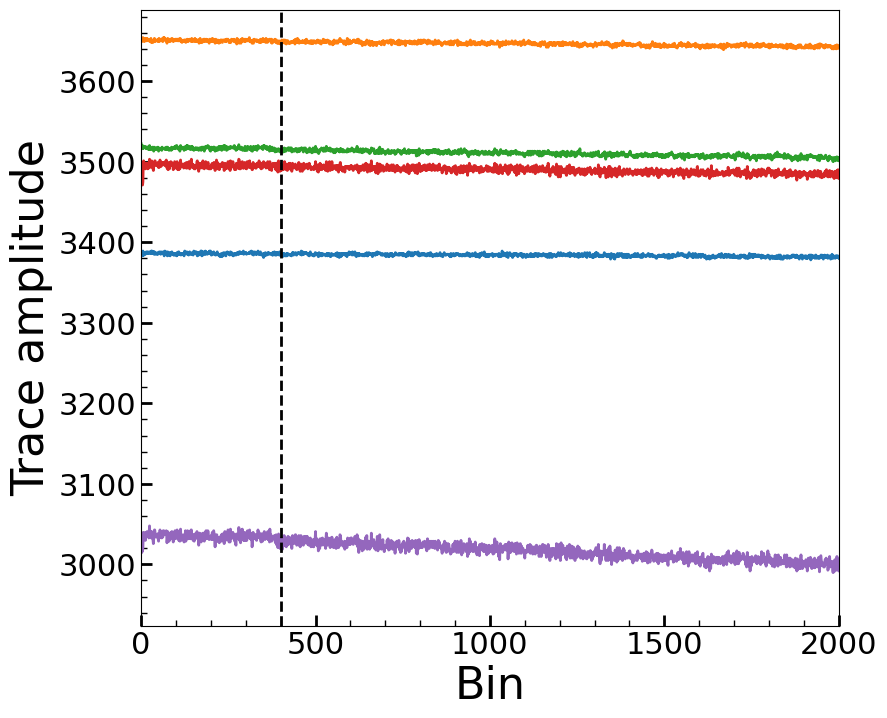

72208302118
5420856
[3173 3173 3172 ... 3166 3165 3164]


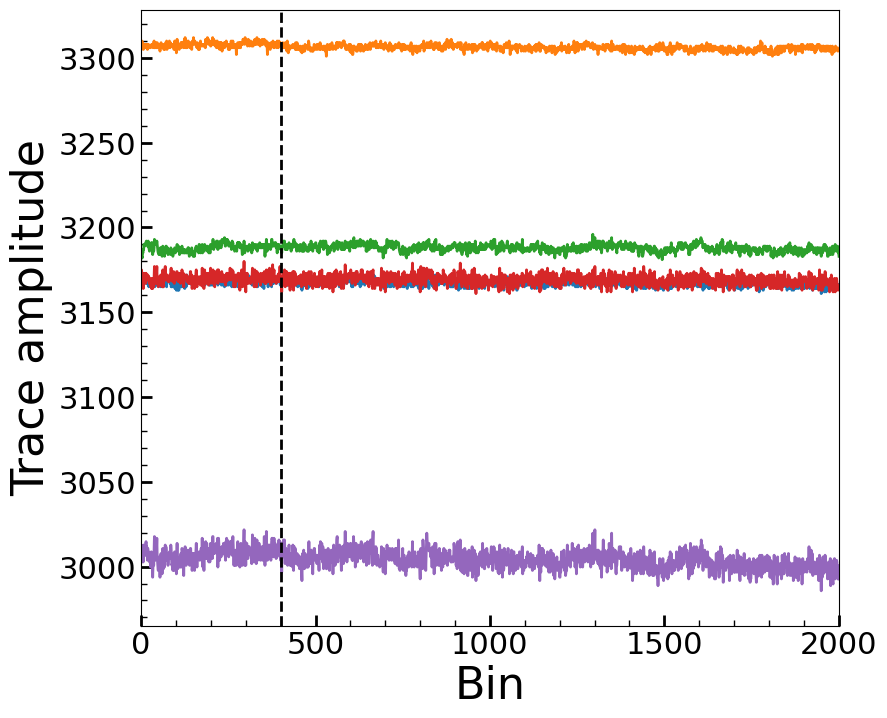

72208311151
3670143
[3470 3468 3467 ... 3263 3264 3260]


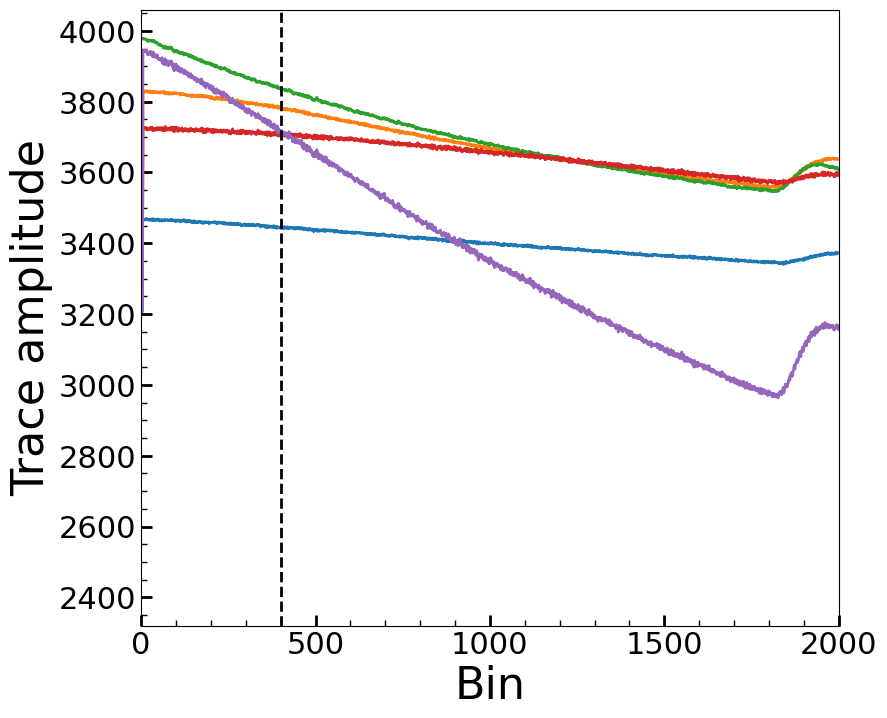

72208311151
3720348
[3450 3451 3452 ... 3399 3396 3401]


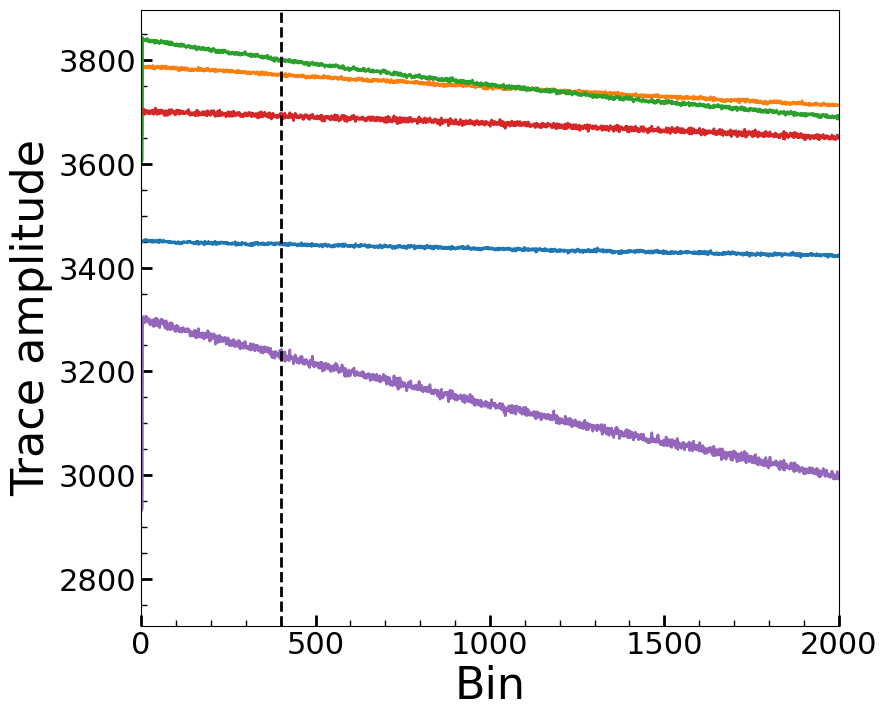

72208311151
3730631
[3270 3269 3269 ... 3200 3198 3199]


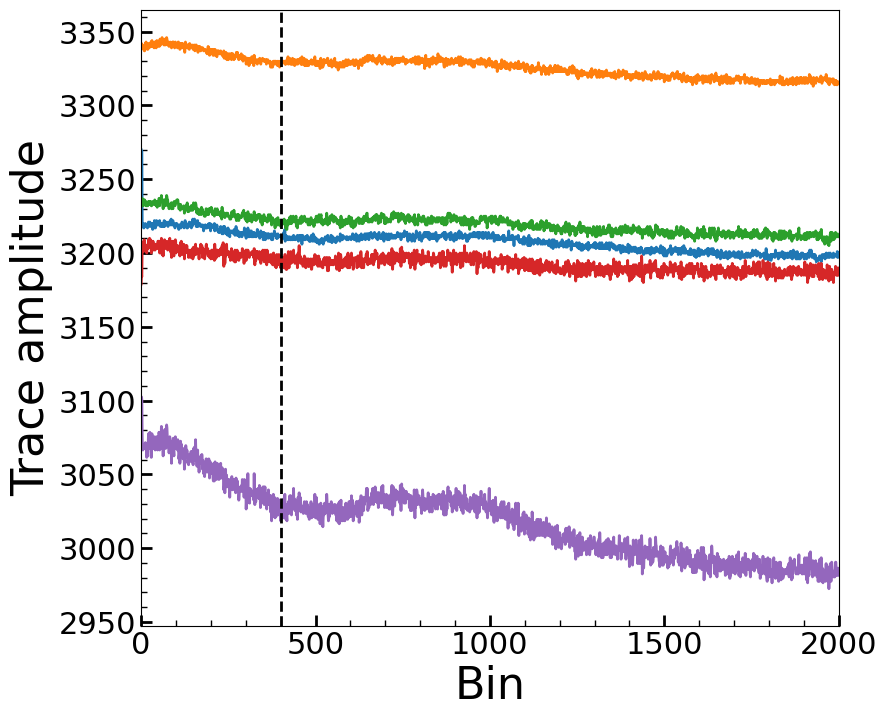

72208311151
3740829
[3415 3415 3415 ... 3377 3377 3375]


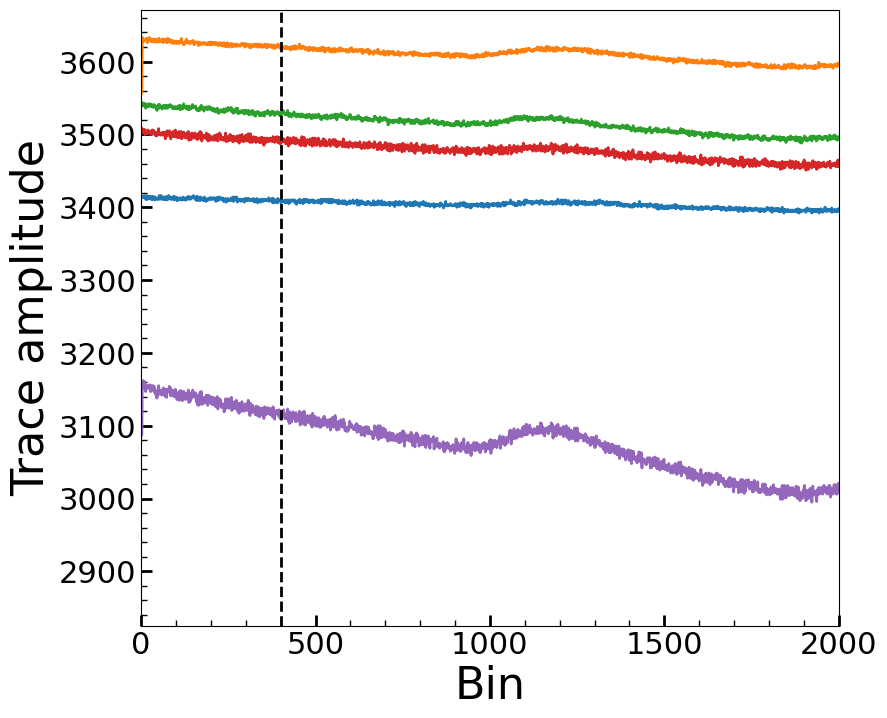

72209162200
3690436
[3167 3164 3168 ... 3187 3186 3182]


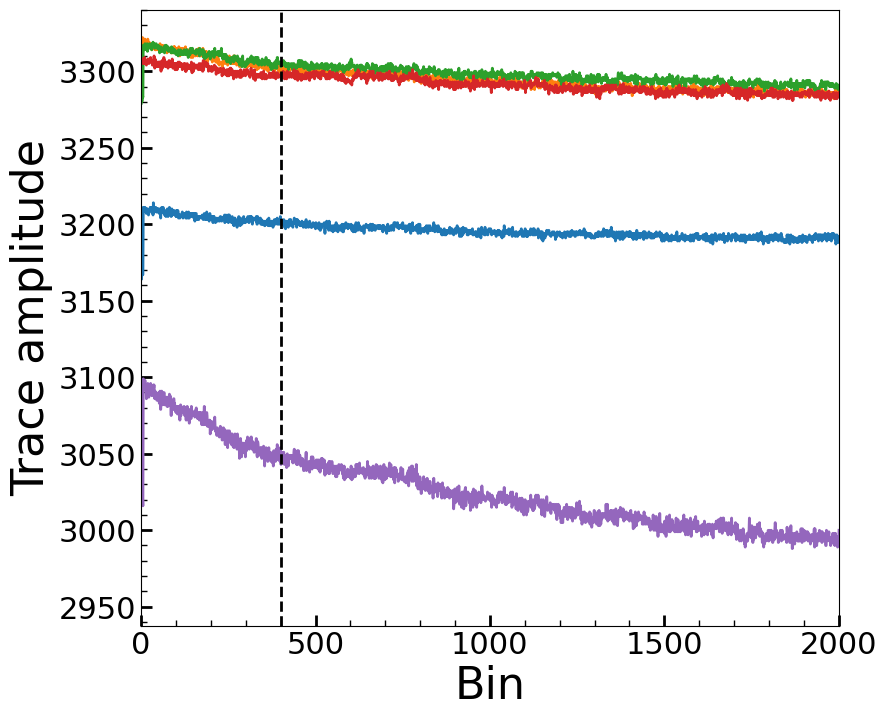

72209162200
4110008
[3060 3060 3061 ... 3056 3055 3056]


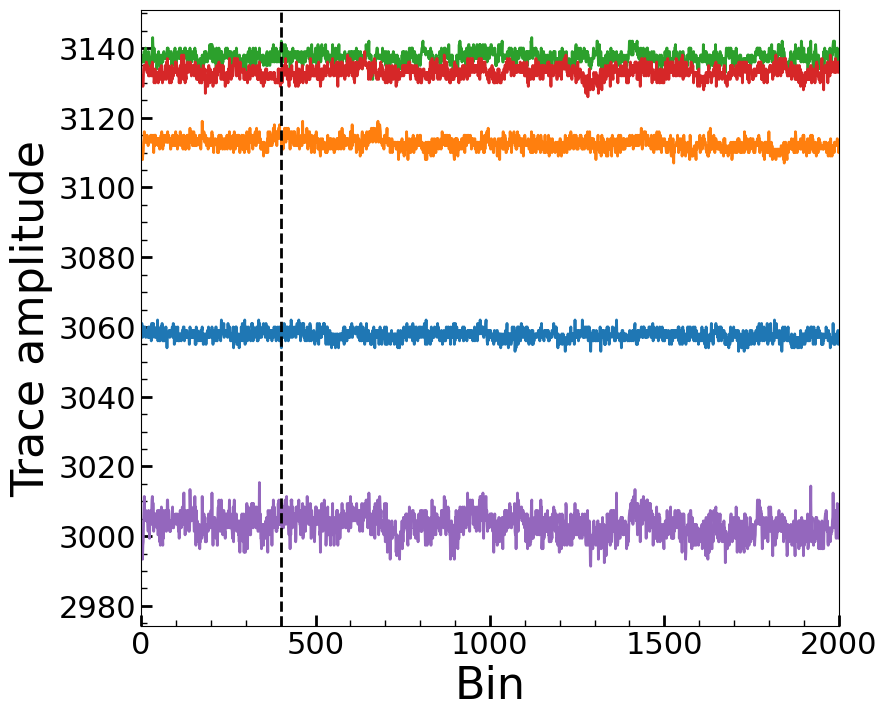

72209162200
5540101
[3204 3202 3218 ... 3213 3213 3213]


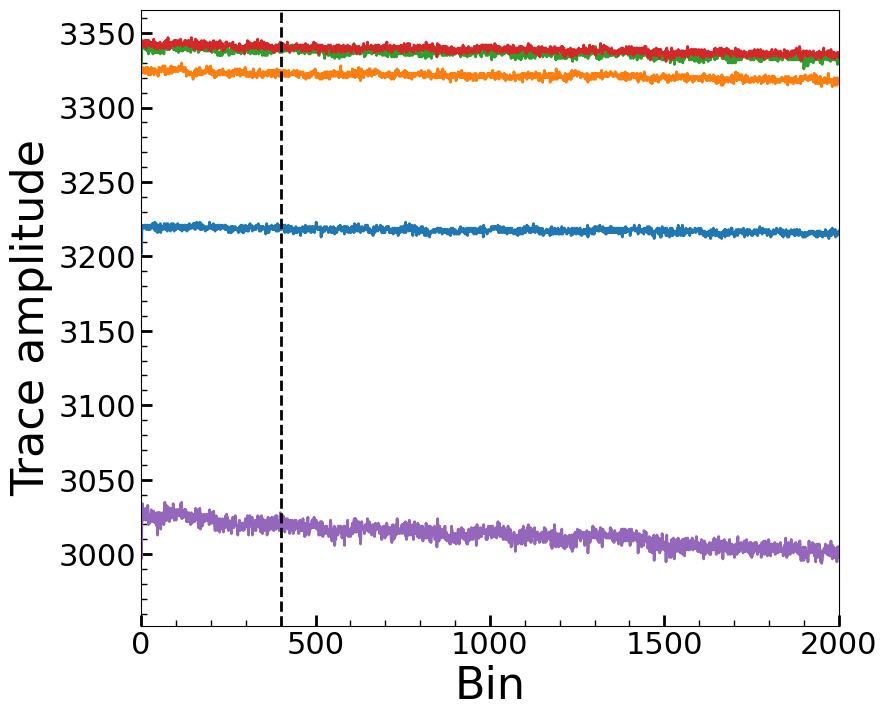

72209162200
5960833
[3448 3449 3450 ... 3444 3444 3444]


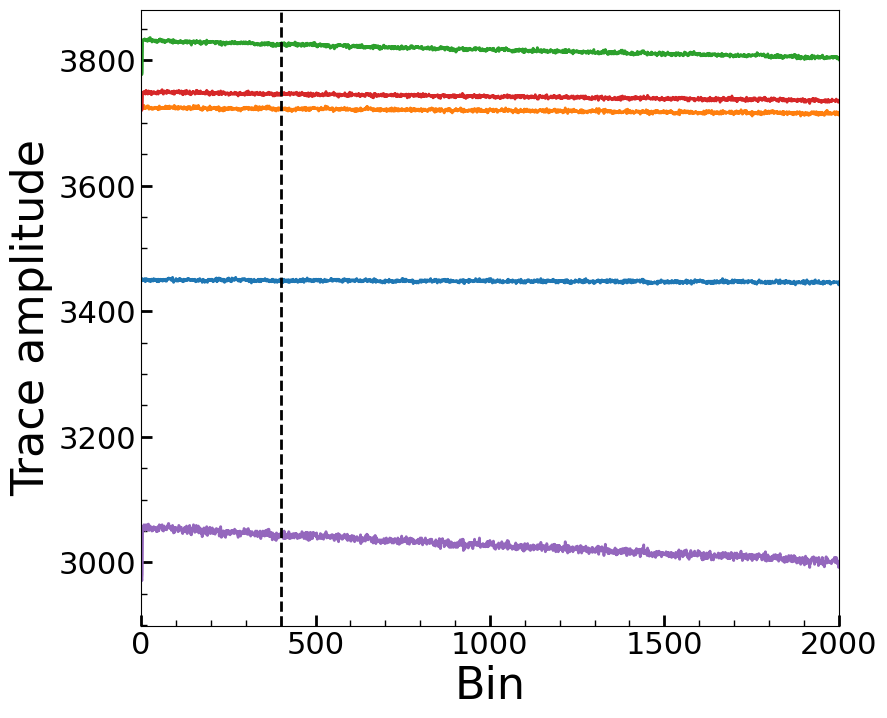

72209171225
2870212
[3305 3304 3302 ... 3262 3265 3262]


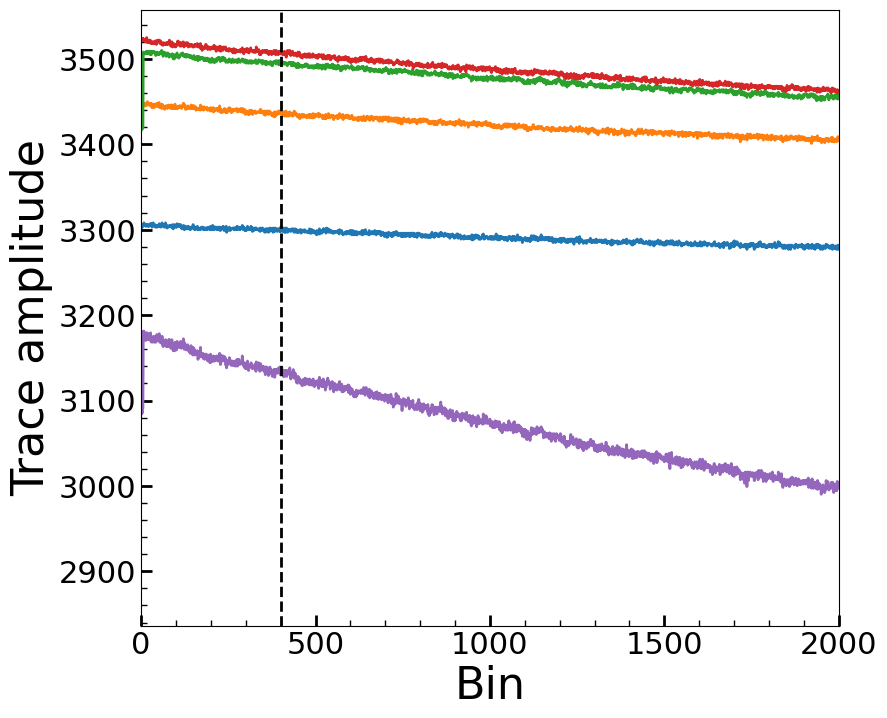

72209171225
2920568
nan
72209171225
4450228
[3144 3146 3146 ... 3150 3148 3149]


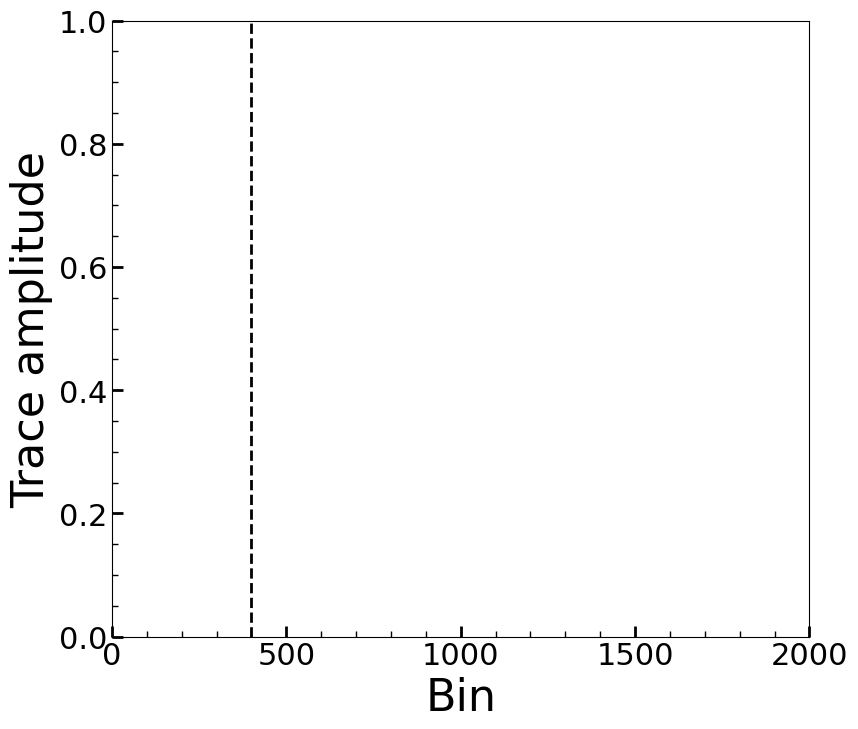

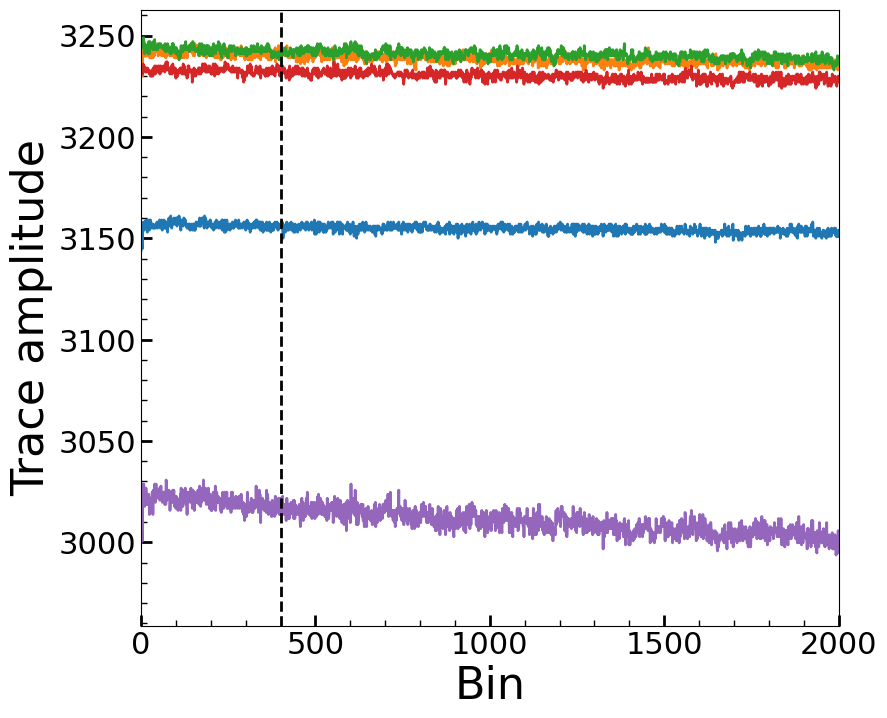

72209171225
4680336
[3170 3170 3170 ... 3161 3162 3163]


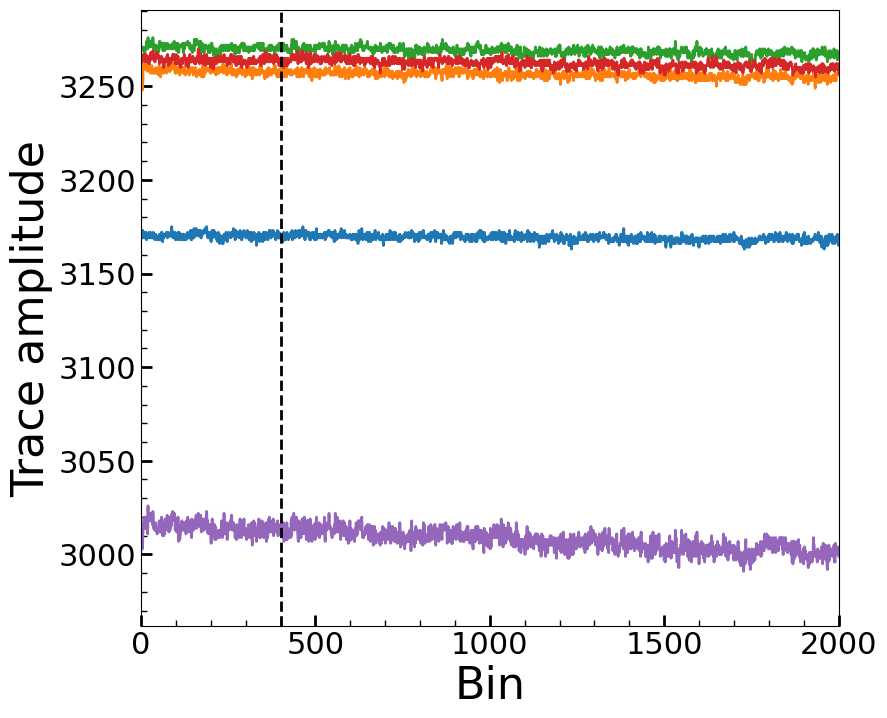

72209172155
630735
[3150 3148 3148 ... 3145 3147 3149]


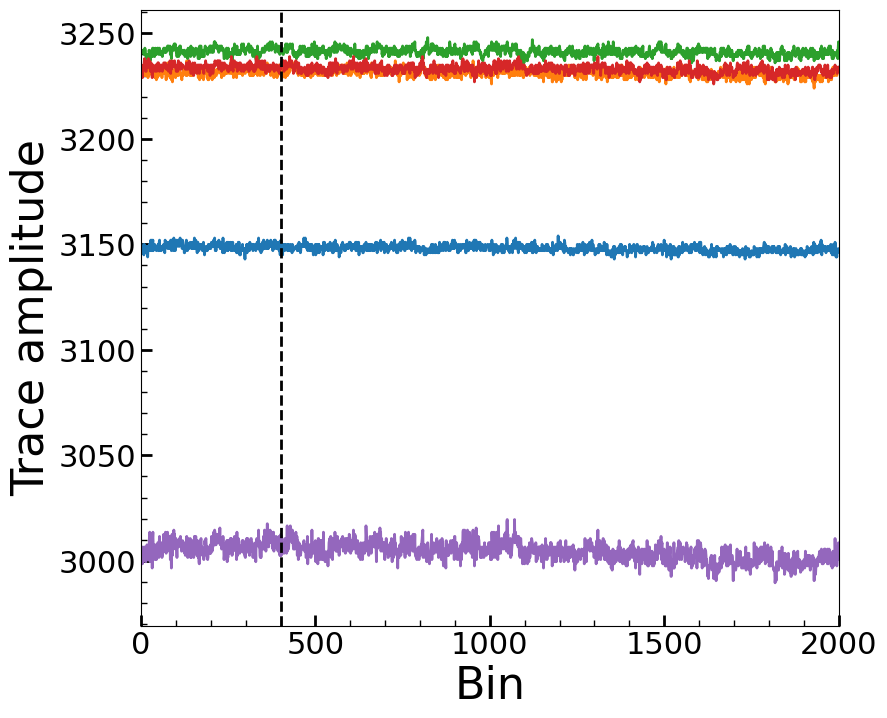

72210192240
1301001
[3020 3020 3020 ... 3022 3021 3023]


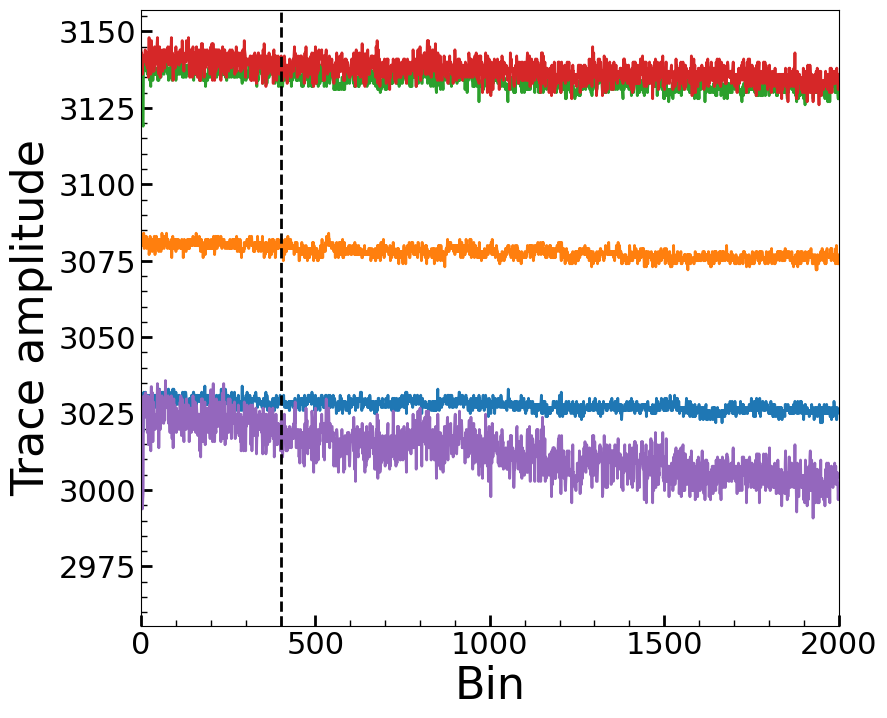

72210192240
2060066
[3085 3082 3084 ... 3114 3113 3113]


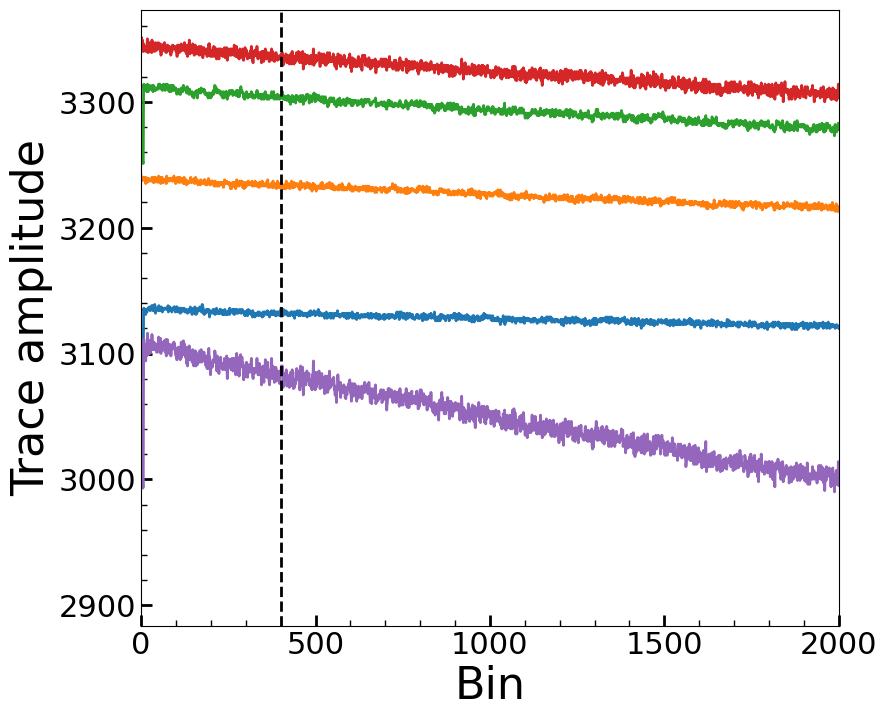

72210192240
3700639
[3158 3154 3157 ... 3149 3149 3147]


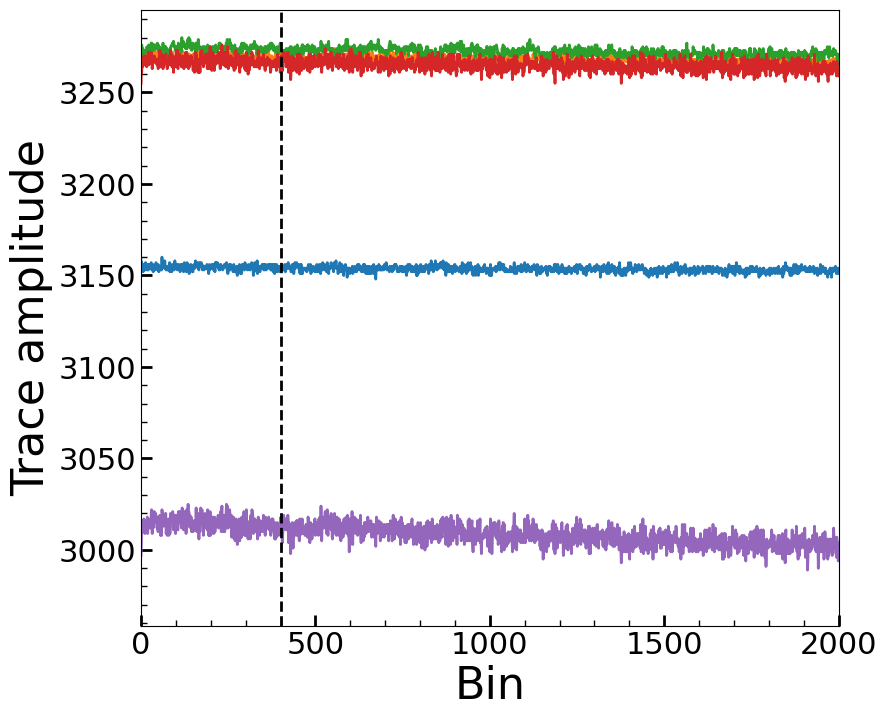

72210251956
4130203
[3229 3228 3228 ... 3192 3190 3191]


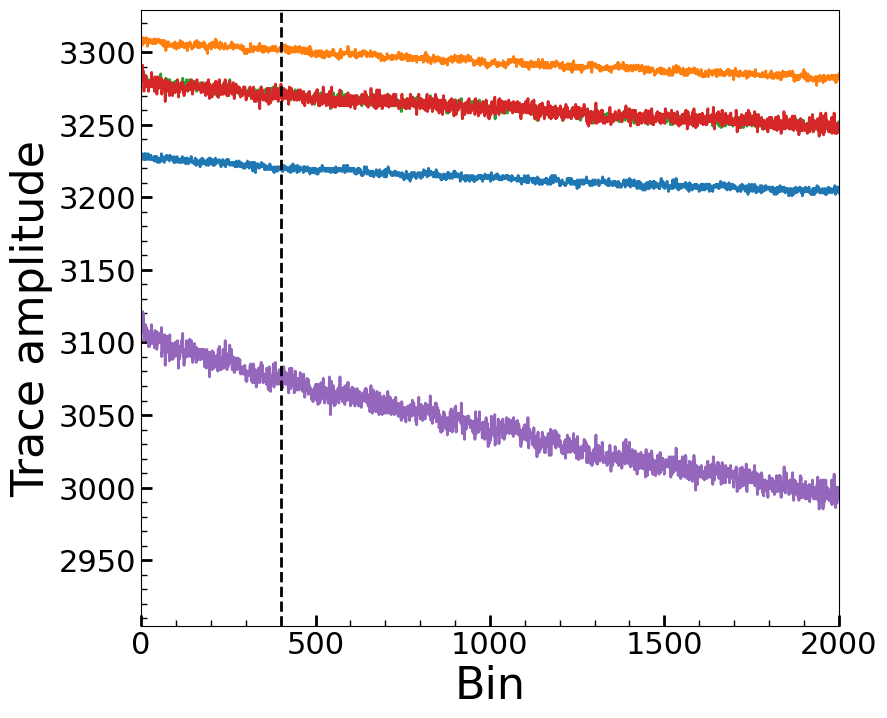

72210261049
10204
[3159 3158 3159 ... 3149 3151 3149]


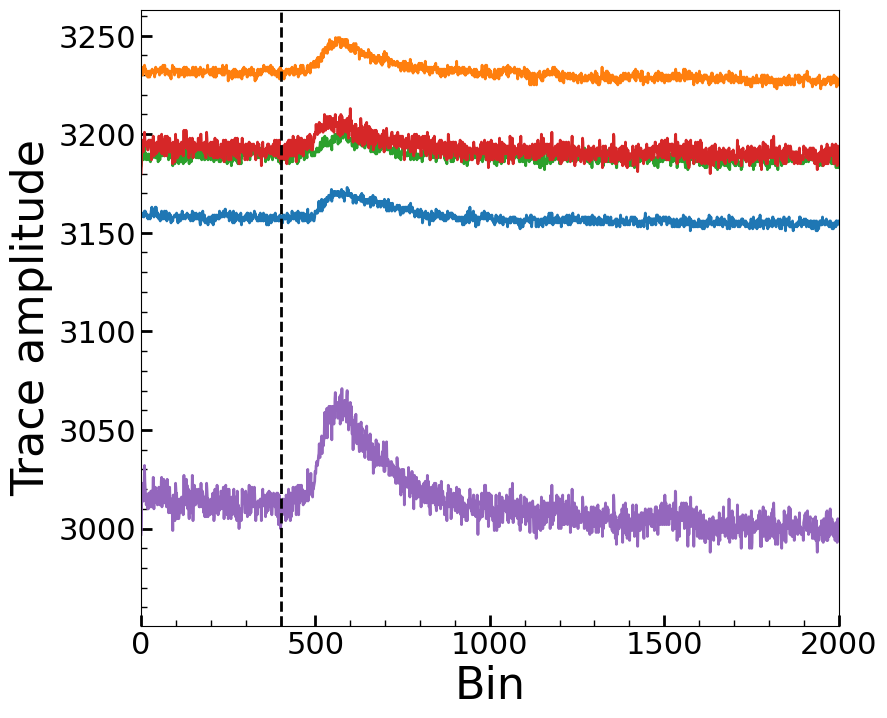

72210262224
1021241
[3139 3138 3138 ... 3134 3134 3134]


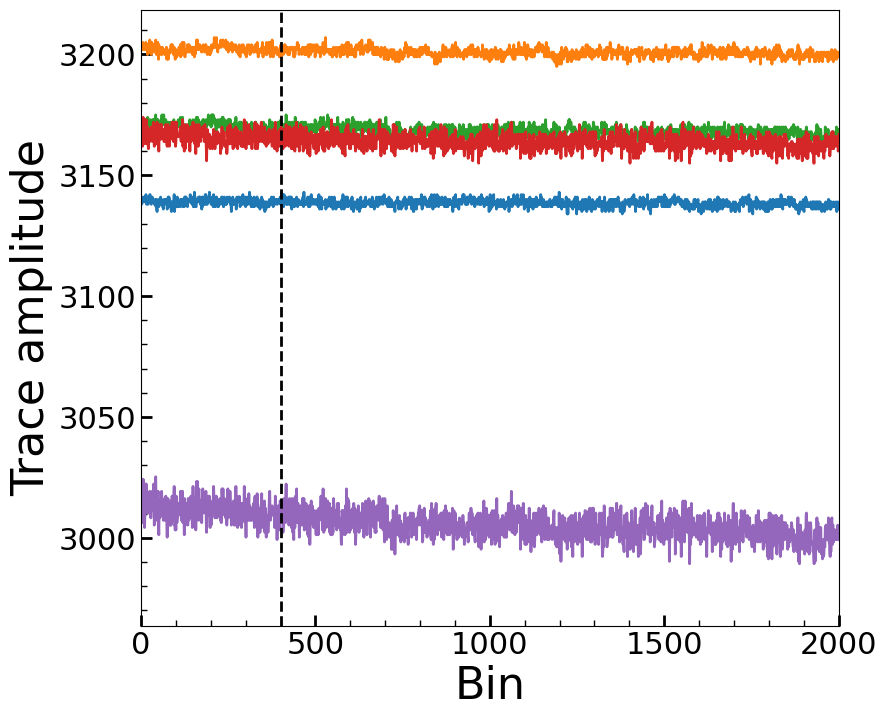

72210262224
1060563
[3139 3138 3137 ... 3476 3476 3478]


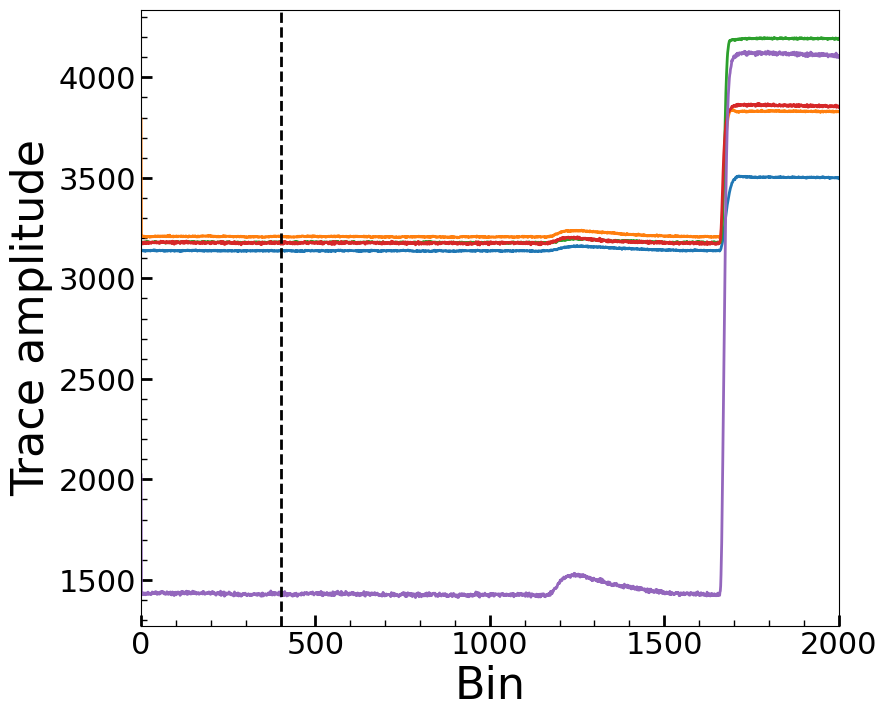

72210262224
2210217
[3124 3122 3122 ... 3116 3118 3118]


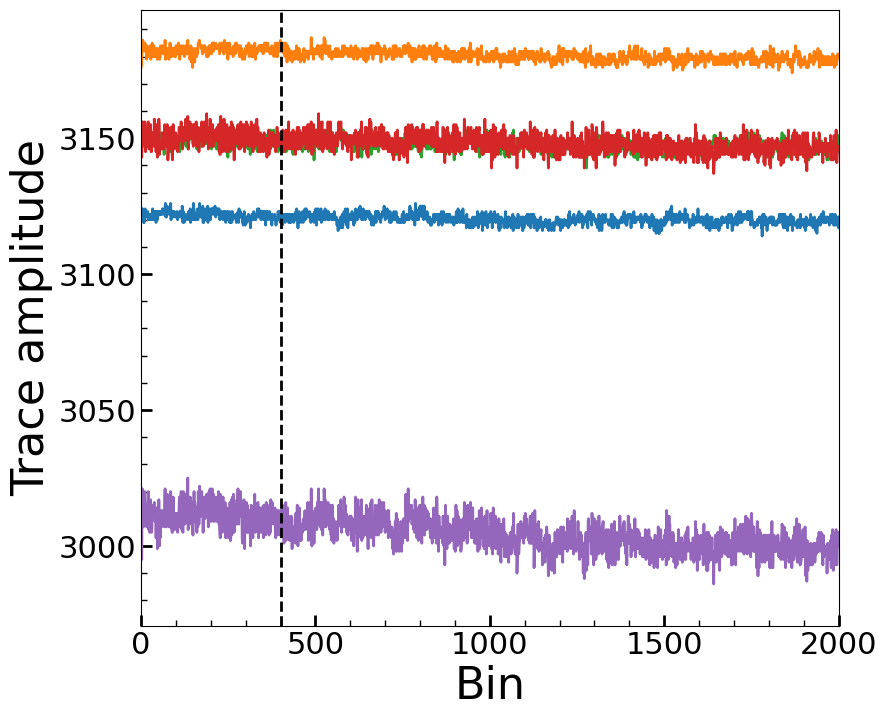

72210262224
3100563
nan


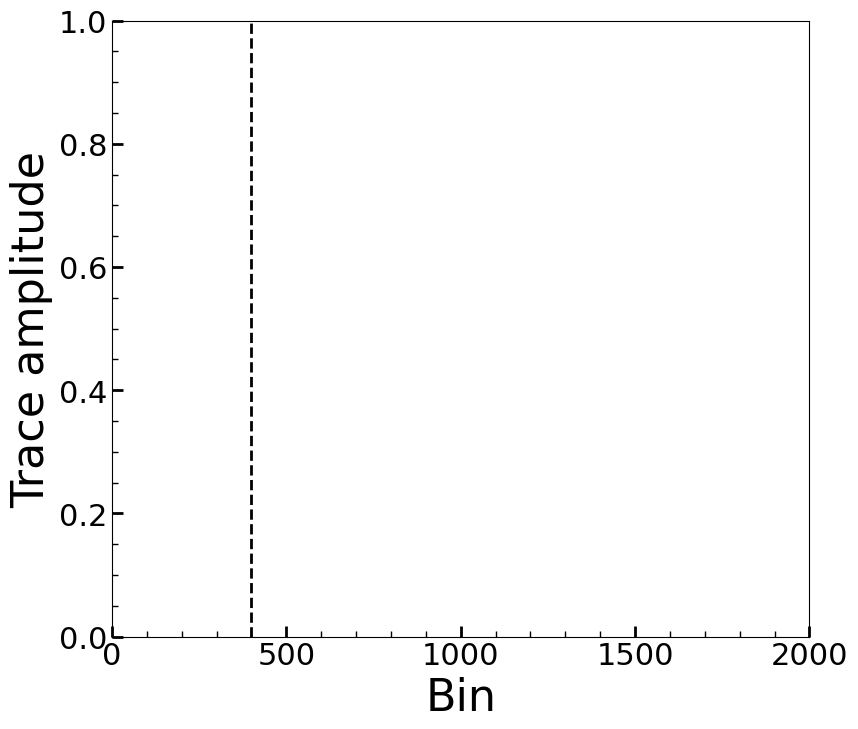

In [6]:
for s in pulse_struct:
    ser=int(s.replace('_',''))
    for ev in pulse_struct[s]:
      print(ser)
      print(ev)
      fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
      ax1 = axes
      print(exampleObj['Z1']['PA'][ser,ev])
      shownpulses=0

      #plt.subplot(8,12)
      if(not isRailed(exampleObj['Z1']['PA'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PA'][ser,ev]) # index 0 corresponds to first event
      if(not isRailed(exampleObj['Z1']['PB'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PB'][ser,ev])
      if(not isRailed(exampleObj['Z1']['PC'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PC'][ser,ev])
      if(not isRailed(exampleObj['Z3']['PB'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PB'][ser,ev]) # index 0 corresponds to first event
      if(not isRailed(exampleObj['Z3']['PC'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PC'][ser,ev])
      if(not isRailed(exampleObj['Z3']['PD'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PD'][ser,ev])

      if(shownpulses>0):
        ax1.plot(getPTPulse(exampleObj,ser,ev)+3000)
      #plt.title('PA')
      ax1.set_xlim(0,2000)
      ax1.set_xlabel('Bin')
      ax1.set_ylabel('Trace amplitude')
      plt.axvline(x=400,color='k',linestyle="--")

      #plt.suptitle('Event 0 on Z1 PA Channels')
      if(shownpulses>0):
        plt.show()